<a href="https://colab.research.google.com/github/IngEd11/usta_2024/blob/main/Fuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Instalando librerias

In [41]:
!pip install scikit-fuzzy

# 2. Importar librerias

In [42]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Control Proporcional - Sistema SISO
Diseñar un control proporcional para una entrada (error) y una salida(acción de control)

**Variable de entrada (input)- Antecedente**

error
*   ¿Qué tan grande es el error?
*   Conjunto término: [Negativo, Cero, Positivo]
*   Universo: el universo de esta variable se define en [-100,100] %

**Variable de salida (output)- Consecuencia**

control
*   La acción de control se define como una tensión de máximo 12 V ¿Cuál es el valor de la acción de control?
*   Conjunto término: [Negativo, Cero, Positivo]
*   Universo: el universo de esta variable se define en [-12,12] %

**Reglas**

1.   **SI** El error es *negativo* **ENTONCES** La acción de control es *negativa*
2.   **SI** El error es *cero* **ENTONCES** La acción de control es *cero*
3.   **SI** El error es *positivo* **ENTONCES** La acción de control es *positivo*





### **PASO 1. Variable de entrada**

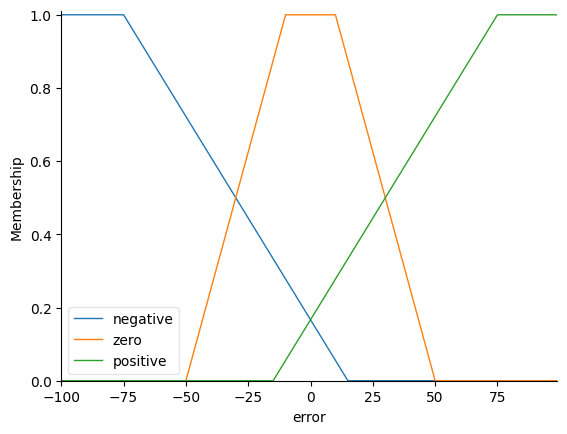

In [43]:
error = ctrl.Antecedent(np.arange(-100,100,1),'error')
error['negative'] = fuzz.trapmf(error.universe,[-100,-100,-75,15])
error['zero'] = fuzz.trapmf(error.universe,[-50,-10,10,50])
error['positive'] = fuzz.trapmf(error.universe,[-15,75,100,100])
error.view()

### **PASO 2. Variable de salida**

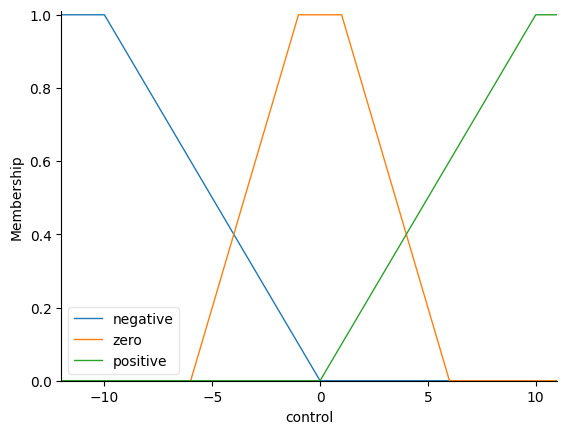

In [44]:
control = ctrl.Consequent(np.arange(-12,12,1), 'control')
control['negative'] = fuzz.trapmf(control.universe,[-12,-12,-10,0])
control['zero'] = fuzz.trapmf(control.universe,[-6,-1,1,6])
control['positive'] = fuzz.trapmf(control.universe,[0,10,12,12])
control.view()

### **PASO 3. Inferencia**

In [45]:
rule1 = ctrl.Rule(error['negative'],control['negative'])
rule2 = ctrl.Rule(error['zero'],control['zero'])
rule3 = ctrl.Rule(error['positive'],control['positive'])

In [46]:
control_sys = ctrl.ControlSystem([rule1,rule2,rule3])
control_sim = ctrl.ControlSystemSimulation(control_sys)

### **PASO 4. Evaluar/SImular en un punto**

Salida defuzzificada = 3.098290598290598
Salida defuzzificada  redondeada= 3.1


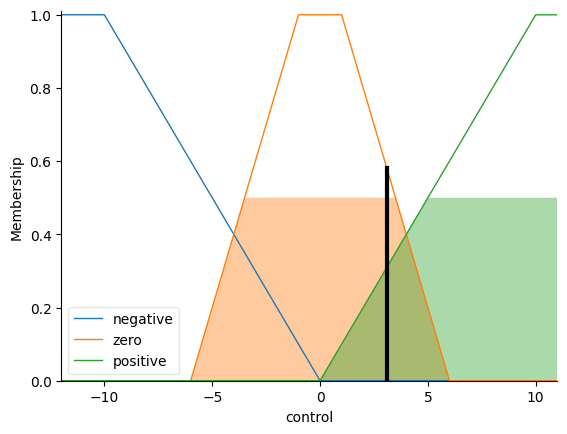

In [47]:
control_sim.input['error'] = 30
control_sim.compute()
control.view(sim=control_sim)
print("Salida defuzzificada =", control_sim.output['control'])
print("Salida defuzzificada  redondeada=", round(control_sim.output['control'],2))

### **Paso 5. Gráfica de salida - Contorno**

In [48]:
error_values = np.linspace(-100,100,2001)
out = np.zeros_like(error_values)
n = error_values.size

In [49]:
for i in range (n):
  control_sim.input['error'] = error_values[i]
  control_sim.compute()
  out[i]  = control_sim.output['control']

In [50]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'acción de control [V]')

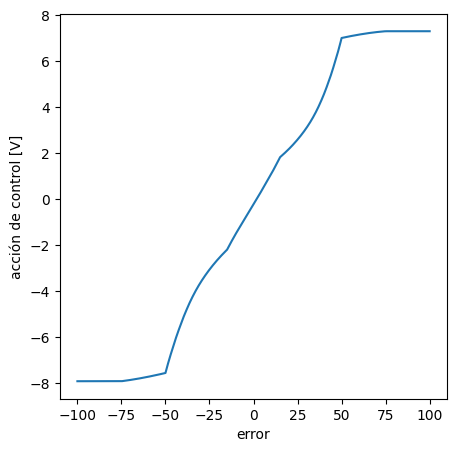

In [51]:
fig = plt.figure(figsize=(5, 5))
plt.plot(error_values,out)
plt.xlabel('error')
plt.ylabel('acción de control [V]')

 Se cambió de una función triangular (trimf) a una trapezoidal (trapmf). Esto ampliando el rango del error considerado como "cero", creando una zona más grande donde la acción de control es mínima.

Al ajustar la funcion y las consideraciones de la zonas que se representan dentro de la entrada, tenemos un sistema que pude detectar de mejor manera los cambios en el error, dando una grafica de salida mas semejante a una funcion lineal

# PARTE 2

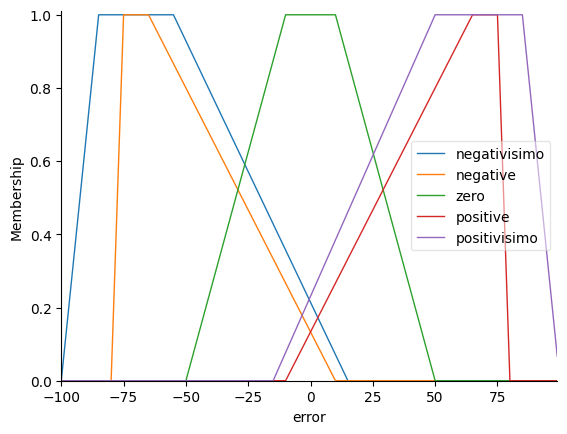

In [58]:
error['negativisimo'] = fuzz.trapmf(error.universe,[-100,-85,-55,15]) # Corrected the order of points in abcd to satisfy the condition a <= b <= c <= d
error['negative'] = fuzz.trapmf(error.universe,[-80,-75,-65,10])
error['zero'] = fuzz.trapmf(error.universe,[-50,-10,10,50])
error['positive'] = fuzz.trapmf(error.universe,[-10,65,75,80])
error['positivisimo'] = fuzz.trapmf(error.universe,[-15,50,85,100])
error.view()

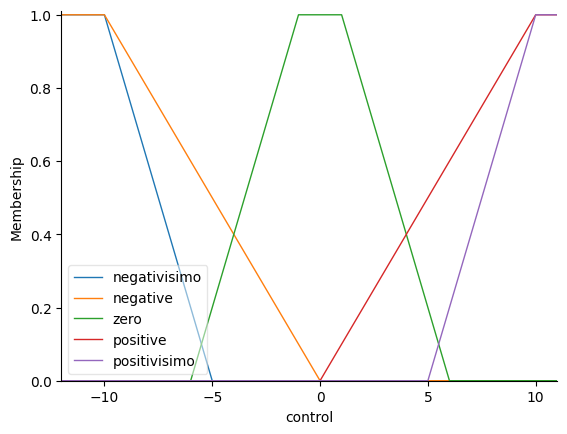

In [60]:
control = ctrl.Consequent(np.arange(-12,12,1), 'control')
control['negativisimo'] = fuzz.trapmf(control.universe,[-12,-12,-10,-5])
control['negative'] = fuzz.trapmf(control.universe,[-12,-12,-10,0])
control['zero'] = fuzz.trapmf(control.universe,[-6,-1,1,6])
control['positive'] = fuzz.trapmf(control.universe,[0,10,12,12])
control['positivisimo'] = fuzz.trapmf(control.universe,[5,10,12,12])
control.view()

In [62]:
rule1 = ctrl.Rule(error['negativisimo'],control['negativisimo'])  # Corrected the typo in the membership function name
rule2 = ctrl.Rule(error['negative'],control['negative'])
rule3 = ctrl.Rule(error['zero'],control['zero'])
rule4 = ctrl.Rule(error['positive'],control['positive'])
rule5 = ctrl.Rule(error['positivisimo'],control['positivisimo'])

In [63]:
control_sys = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5])
control_sim = ctrl.ControlSystemSimulation(control_sys)

Salida defuzzificada = 3.5776820952648754
Salida defuzzificada  redondeada= 3.58


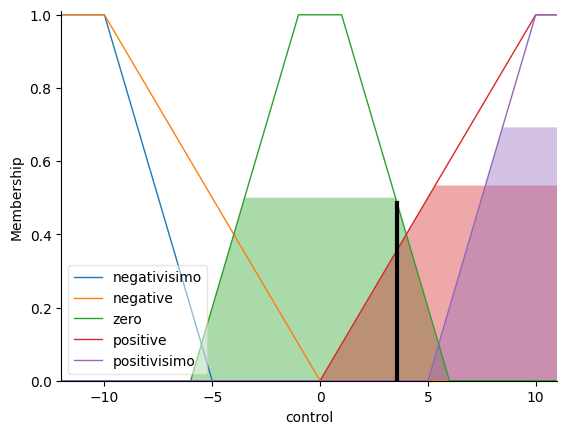

In [64]:
control_sim.input['error'] = 30
control_sim.compute()
control.view(sim=control_sim)
print("Salida defuzzificada =", control_sim.output['control'])
print("Salida defuzzificada  redondeada=", round(control_sim.output['control'],2))

In [65]:
error_values = np.linspace(-100,100,2001)
out = np.zeros_like(error_values)
n = error_values.size

In [66]:
for i in range (n):
  control_sim.input['error'] = error_values[i]
  control_sim.compute()
  out[i]  = control_sim.output['control']

KeyError: 'control'

Text(0, 0.5, 'acción de control [V]')

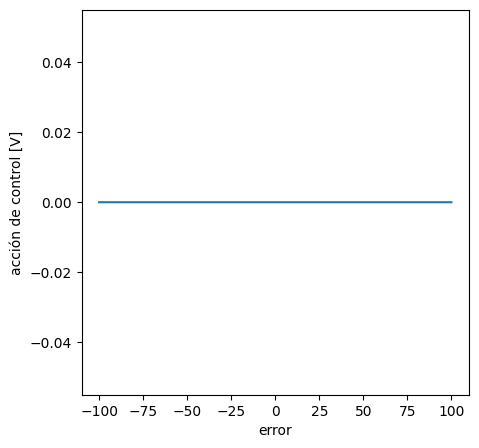

In [67]:
fig = plt.figure(figsize=(5, 5))
plt.plot(error_values,out)
plt.xlabel('error')
plt.ylabel('acción de control [V]')